In [19]:
#Importing the datset 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filenames = [
    "../data/pct_data_2018.csv",
    "../data/pct_data_2019.csv",
    "../data/pct_data_2020.csv",
    "../data/pct_data_2021.csv",
    "../data/pct_data_2022.csv",
    "../data/pct_data_2023.csv",
    "../data/pct_data_2024.csv"
]

# Read each file into a DF and store them in a list
dataframes = [pd.read_csv (f, sep=';') for f in filenames]

# Concatenate all dfs into a single df
raw_data= pd.concat(dataframes, ignore_index=True)
raw_dataset = raw_data

In [20]:
# Define a function that categorizes sepsis based on PCT values
def categorize_sepsis(pct_value):
    if pct_value > 2:
        return 'P'  # Positive, sepsis likely
    elif pct_value >= 0.1:
        return 'I'  # Intermediate, intermediate or gray area
    else:
        return 'N'  # Negative, sepsis unlikely

# Apply this function to the 'PCT' column to create a new categorical column
raw_dataset['sepsis_cat'] = raw_dataset['PCT'].apply(categorize_sepsis)

# Insert the 'sepsis_cat' column before the 'PCT' column
pct_index = raw_dataset.columns.get_loc('PCT')  # Find the index of 'PCT' column
raw_dataset.insert(pct_index, 'sepsis_cat', raw_dataset.pop('sepsis_cat'))
raw_dataset.shape

(109897, 34)

In [21]:
# Data subsets for different sepsis categories
pct_data_sepsis_yes = raw_dataset[raw_dataset['sepsis_cat'] == 'P']
pct_data_sepsis_no = raw_dataset[raw_dataset['sepsis_cat'] == 'N']
pct_data_sepsis_I = raw_dataset[raw_dataset['sepsis_cat'] == 'I']
combined_data = pd.concat([pct_data_sepsis_yes, pct_data_sepsis_no], axis=0)
print(combined_data.shape)
print(pct_data_sepsis_I.shape)

(69923, 34)
(39974, 34)


In [22]:
raw_dataset = combined_data

preprocessing

(68727, 34)
(39010, 34)
(68727, 34)
(39010, 34)
(68727, 30)
(39010, 30)
(68727, 30)
(39010, 30)
Count of null or negative values in 'age' column: 2
Count of null or negative values in 'age' column: 1
order_number    0
sex             0
sepsis_cat      0
PCT             0
IL6             0
HK              0
LYMABS          0
THROMB          0
MONOZY          0
HB              0
GRANAB          0
MPV             0
RDW-SD          0
MicroE          0
MCHC            0
LYMPHO          0
IG%             0
IG#             0
ERY             0
EOSABS          0
MakroE          0
MCH             0
GRANUL          0
EOSINO          0
LEUKO           0
BASOAB          0
MCV             0
MONABS          0
BASOPH          0
age             0
dtype: int64
order_number    0
sex             0
sepsis_cat      0
PCT             0
IL6             0
HK              0
LYMABS          0
THROMB          0
MONOZY          0
HB              0
GRANAB          0
MPV             0
RDW-SD          0
MicroE       

C:\Users\menia\AppData\Local\Temp\ipykernel_10612\3282416036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset['sex'] = raw_dataset['sex'].replace({'f': 'W', 'm': 'M'})
C:\Users\menia\AppData\Local\Temp\ipykernel_10612\3282416036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset.drop(columns=columns_to_drop, axis=1, inplace=True)
C:\Users\menia\AppData\Local\Temp\ipykernel_10612\3282416036.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

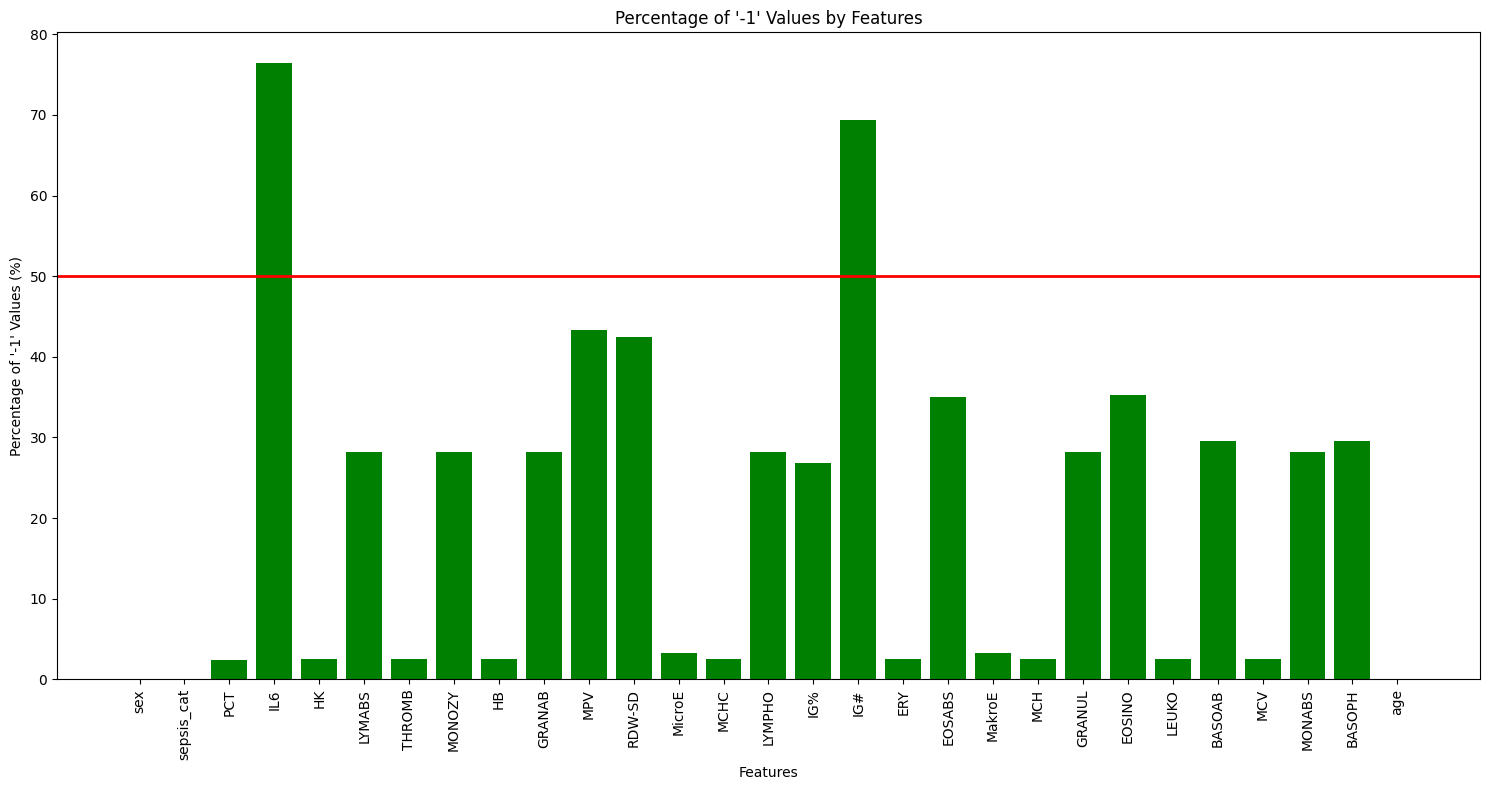

C:\Users\menia\AppData\Local\Temp\ipykernel_10612\3282416036.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, axis=1, inplace=True)


order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK               1110
LYMABS          18457
THROMB           1119
MONOZY          18472
HB               1110
GRANAB          18464
MPV             28558
RDW-SD          27989
MicroE           1639
MCHC             1110
LYMPHO          18458
IG%             17534
ERY              1110
EOSABS          23084
MakroE           1629
MCH              1110
GRANUL          18464
EOSINO          23283
LEUKO            1132
BASOAB          19373
MCV              1110
MONABS          18473
BASOPH          19408
age                 0
dtype: int64
order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK                944
LYMABS          16612
THROMB            947
MONOZY          16641
HB                944
GRANAB          16632
MPV             17789
RDW-SD          17263
MicroE           1365
MCHC              944
LYMPHO          16612
IG%             15827
ERY               9

In [23]:
# Filter the DataFrame to keep only rows where 'sex' is either 'M' or 'W'
raw_dataset = raw_dataset[raw_dataset['sex'].isin(['m', 'f'])]
pct_data_sepsis_I = pct_data_sepsis_I[pct_data_sepsis_I['sex'].isin(['m', 'f'])]
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)
# Transform sex column: 'f' to 'W' and 'm' to 'M'
raw_dataset['sex'] = raw_dataset['sex'].replace({'f': 'W', 'm': 'M'})
pct_data_sepsis_I['sex'] = pct_data_sepsis_I['sex'].replace({'f': 'W', 'm': 'M'})
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)
columns_to_drop = ['%h-ERY', 'NOR-Ge', 'XNRBC', 'Unnamed: 0']
raw_dataset.drop(columns=columns_to_drop, axis=1, inplace=True)
pct_data_sepsis_I.drop(columns=columns_to_drop, axis=1, inplace=True)
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)
current_year = 2024
raw_dataset['age'] = current_year - raw_dataset['year_of_birth']
# Drop the 'year_of_birth' column without reassigning clean_data
raw_dataset.drop('year_of_birth', axis=1, inplace=True)

pct_data_sepsis_I['age'] = current_year - pct_data_sepsis_I['year_of_birth']
# Drop the 'year_of_birth' column without reassigning clean_data
pct_data_sepsis_I.drop('year_of_birth', axis=1, inplace=True)

print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)
count_null_or_negative = (raw_dataset['age'].isna() | (raw_dataset['age'] <= 0)).sum()
count_null_or_negativeI = (pct_data_sepsis_I['age'].isna() | (pct_data_sepsis_I['age'] <= 0)).sum()

print("Count of null or negative values in 'age' column:", count_null_or_negative)
print("Count of null or negative values in 'age' column:", count_null_or_negativeI)
filtered_df = raw_dataset
# Remove rows where the 'age' column has null values
filtered_df = filtered_df.dropna(subset=['age'])
pct_data_sepsis_I = pct_data_sepsis_I.dropna(subset=['age'])
# Calculate the count of null values in each column
null_counts = filtered_df.isnull().sum()
null_countsI = pct_data_sepsis_I.isnull().sum()

# Print the count of null values for each column
print(null_counts)
print(null_countsI)
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)
#Counting minus 1 on all columns:
counts_minus_one = (filtered_df == -1).sum()

# Display the count for each column
print(counts_minus_one)

#Counting minus 1 on all columns:
counts_minus_oneI = (pct_data_sepsis_I == -1).sum()

# Display the count for each column
print(counts_minus_oneI)
# Calculate the percentage of '-1' values for each column
percentage_minus_one = (counts_minus_one / filtered_df.shape[0]) * 100
percentage_minus_oneI = (counts_minus_oneI / pct_data_sepsis_I.shape[0]) * 100

# Display the percentage for each column
print(percentage_minus_one)
print(percentage_minus_oneI)

import matplotlib.pyplot as plt
import pandas as pd

# New dataset with updated values
percentage_minus_one = pd.Series({
    'sex': 0.000000,
    'sepsis_cat': 0.000000,
    'PCT': 2.393598,
    'IL6': 76.426337,
    'HK': 2.491088,
    'LYMABS': 28.174609,
    'THROMB': 2.505638,
    'MONOZY': 28.197890,
    'HB': 2.491088,
    'GRANAB': 28.184794,
    'MPV': 43.317570,
    'RDW-SD': 42.469262,
    'MicroE': 3.282648,
    'MCHC': 2.492543,
    'LYMPHO': 28.176064,
    'IG%': 26.789378,
    'IG#': 69.353219,
    'ERY': 2.491088,
    'EOSABS': 35.026555,
    'MakroE': 3.268097,
    'MCH': 2.491088,
    'GRANUL': 28.184794,
    'EOSINO': 35.324845,
    'LEUKO': 2.524554,
    'BASOAB': 29.539469,
    'MCV': 2.491088,
    'MONABS': 28.199345,
    'BASOPH': 29.591852,
    'age': 0.000000
})


# Create a bar chart
plt.figure(figsize=(15, 8))  # Adjusted the figure size for better visibility
plt.bar(percentage_minus_one.index, percentage_minus_one.values, color='green')
plt.xlabel('Features')
plt.ylabel('Percentage of \'-1\' Values (%)')
plt.title('Percentage of \'-1\' Values by Features')
# Add a horizontal line at 60%
plt.axhline(y=50, color='r', linestyle='-', linewidth=2)  # red line, solid, width of 2
plt.xticks(rotation=90)  # Rotates the test parameter names for better visibility
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()

columns_to_drop =['IG#', 'IL6']
filtered_df.drop(columns=columns_to_drop, axis=1, inplace=True)
pct_data_sepsis_I.drop(columns=columns_to_drop, axis=1, inplace=True)

#Filter out rows where PCT == -1
filtered_df = filtered_df[filtered_df['PCT'] != -1]
pct_data_sepsis_I = pct_data_sepsis_I[pct_data_sepsis_I['PCT'] != -1]

#Counting minus 1 on all columns:
counts_minus_one = (filtered_df == -1).sum()

# Display the count for each column
print(counts_minus_one)

#Counting minus 1 on all columns:
counts_minus_oneI = (pct_data_sepsis_I == -1).sum()

# Display the count for each column
print(counts_minus_oneI)

# Replace -1 values with NaN
filtered_df.replace(-1, pd.NA, inplace=True)
pct_data_sepsis_I.replace(-1, pd.NA, inplace=True)

# Counting minus 1 on all columns (this will now count NaN instead of -1)
counts_minus_one = filtered_df.isna().sum()
counts_minus_oneI = pct_data_sepsis_I.isna().sum()

# Display the count for each column
print(counts_minus_one)
print(counts_minus_oneI)


#First dataset

In [24]:
# Select specific columns
selected_columns = [
    'age', 'sex', 'HB', 'MCV', 'THROMB', 'ERY', 'LEUKO', 'PCT']

# Creating a new DataFrame with only the selected columns
first_df = filtered_df[selected_columns]

# Display the new DataFrame
print(first_df.head())
# Counting NULL on all columns (this will now count NaN instead of -1)
counts_minus_one = first_df.isna().sum()
print(counts_minus_one)

     age sex    HB    MCV THROMB   ERY LEUKO    PCT
6   60.0   M  10.0   93.4     48  3.18  10.8   2.34
12  90.0   M  11.6   90.2    104  3.68   6.6   6.54
13  80.0   M  11.2   93.5    434  3.72  14.5   5.22
15  55.0   M  11.5  101.8    144  3.37   6.5   3.33
25  68.0   W   9.2   89.9    303  3.06  11.3  36.60
age          0
sex          0
HB        1110
MCV       1110
THROMB    1119
ERY       1110
LEUKO     1132
PCT          0
dtype: int64


In [25]:
#KNN
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Convert pd.NA to np.nan
first_df = first_df.replace({pd.NA: np.nan})

# One-hot encode the 'sex' column
# One-hot encode the 'sex' column and drop the first category
first_df = pd.get_dummies(first_df, columns=['sex'], drop_first=True)
# Step 3: Setup the Iterative Imputer with a KNN estimator
# You can adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Step 4: Fit and transform the data
# This will fill in all missing values in the dataframe
first_df_imputed = pd.DataFrame(imputer.fit_transform(first_df), columns=first_df.columns)

C:\Users\menia\AppData\Local\Temp\ipykernel_10612\3520176608.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  first_df = first_df.replace({pd.NA: np.nan})
c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 300}
Best score (ROC AUC): 0.9167559630641046
auc_scores [0.9131118743013454, 0.9181722651578703, 0.9178953855912063, 0.9150386486938507, 0.9195616415762505]
Mean auc_scores: 0.9167559630641046
accuracy_scores [0.8103011329755516, 0.8553220035778175, 0.865608228980322, 0.8656827668455576, 0.8554710793082886]
Mean accuracy_scores: 0.8504770423375074
precision_scores [0.45162076529368755, 0.5308310991957105, 0.5553772070626003, 0.5561688311688312, 0.5307624374448042]
Mean precision_scores: 0.5249520680331268
recall_scores [0.8626629422718808, 0.8296089385474861, 0.8054003724394786, 0.797486033519553, 0.8393854748603352]
Mean recall_scores: 0.8269087523277469
f1_scores [0.5928651415773476, 0.6474114441416894, 0.6574197225916778, 0.6553175210405509, 0.6503155996393147]
Mean f1_scores: 0.6406658857981161
confusion_matrices [[48169  8171]
 [ 1859  

c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\v

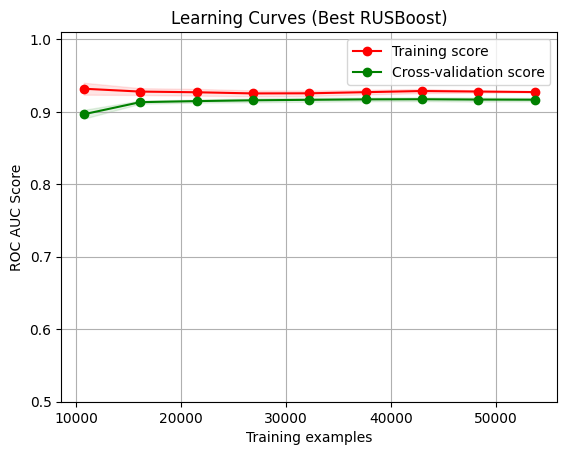

Label
0    56340
1    10740
Name: count, dtype: int64


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Assume data is already loaded and preprocessed
data = first_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Define the parameter grid
param_grid = {
    'estimator__max_depth': [5, 10, 15],
    'n_estimators': [100, 300, 500, 700, 900],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Instantiate a RUSBoostClassifier with a DecisionTreeClassifier as the base estimator
estimator = DecisionTreeClassifier(random_state=42)
model = RUSBoostClassifier(estimator=estimator, random_state=42)

# Setup the GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X, y)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score (ROC AUC):", best_score)

# Perform detailed evaluation on the best model
scores = {
    'auc_scores': [],
    'accuracy_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'f1_scores': [],
    'confusion_matrices': []
}

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Display all results
for metric, values in scores.items():
    if metric == 'confusion_matrices':
        print(metric, np.sum(values, axis=0))
    else:
        print(metric, values)
        print(f"Mean {metric}: {np.mean(values)}")

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best RUSBoost)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
print(y.value_counts())

our important features

In [27]:
# Select specific columns
selected_columns = [
    'age', 'sex', 'HB', 'MCV', 'THROMB', 'ERY', 'LEUKO', 'LYMABS', 'LYMPHO', 'EOSABS', 'BASOAB', 'HK', 'RDW-SD','PCT']

# Creating a new DataFrame with only the selected columns
combined_df = filtered_df[selected_columns]
combined_pct_data_sepsis_I = pct_data_sepsis_I[selected_columns]
# Display the new DataFrame
print(combined_df.head())
print(combined_pct_data_sepsis_I.head())

     age sex    HB    MCV THROMB   ERY LEUKO LYMABS LYMPHO EOSABS BASOAB  \
6   60.0   M  10.0   93.4     48  3.18  10.8   <NA>   <NA>   <NA>   <NA>   
12  90.0   M  11.6   90.2    104  3.68   6.6   0.41    6.2   <NA>   0.01   
13  80.0   M  11.2   93.5    434  3.72  14.5   <NA>   <NA>   <NA>   <NA>   
15  55.0   M  11.5  101.8    144  3.37   6.5   0.37    5.7   0.01   0.05   
25  68.0   W   9.2   89.9    303  3.06  11.3    0.8    7.1   0.07   0.06   

      HK RDW-SD    PCT  
6   29.7   <NA>   2.34  
12  33.2   <NA>   6.54  
13  34.8   <NA>   5.22  
15  34.3   <NA>   3.33  
25  27.5   <NA>  36.60  
    age sex    HB   MCV THROMB   ERY LEUKO LYMABS LYMPHO EOSABS BASOAB    HK  \
0  65.0   W   9.9  87.1    117  3.49  14.8   0.74    5.0   0.21   0.03  30.4   
1  81.0   M   9.4  91.2    239  2.94  16.4   2.39   14.5   0.03   0.08  26.8   
2  61.0   M   9.8  86.3    426  3.43  16.6   1.28    7.7   0.56   0.14  29.6   
3  68.0   M   8.2  79.0    202  3.29   7.0   0.11    1.6   <NA>   0.01  2

In [28]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming final_df4 is your initial DataFrame and it contains pd.NA values
combined_df = combined_df.replace({pd.NA: np.nan})  # Correctly reference final_df4 here

# One-hot encode the 'sex' column
combined_df = pd.get_dummies(combined_df, columns=['sex'], drop_first=True)

# Setup the Iterative Imputer with a KNN estimator
# Adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Fit and transform the data to fill in all missing values
combined_df_imputed = pd.DataFrame(imputer.fit_transform(combined_df), columns=combined_df.columns)


C:\Users\menia\AppData\Local\Temp\ipykernel_10612\617911814.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df = combined_df.replace({pd.NA: np.nan})  # Correctly reference final_df4 here
c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [29]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming final_df4 is your initial DataFrame and it contains pd.NA values
combined_pct_data_sepsis_I = combined_pct_data_sepsis_I.replace({pd.NA: np.nan})  # Correctly reference final_df4 here

# One-hot encode the 'sex' column
combined_pct_data_sepsis_I = pd.get_dummies(combined_pct_data_sepsis_I, columns=['sex'], drop_first=True)

# Setup the Iterative Imputer with a KNN estimator
# Adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Fit and transform the data to fill in all missing values
combined_pct_data_sepsis_I_imputed = pd.DataFrame(imputer.fit_transform(combined_pct_data_sepsis_I), columns=combined_pct_data_sepsis_I.columns)


C:\Users\menia\AppData\Local\Temp\ipykernel_10612\1369221748.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_pct_data_sepsis_I = combined_pct_data_sepsis_I.replace({pd.NA: np.nan})  # Correctly reference final_df4 here
c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'estimator__max_depth': 15, 'learning_rate': 0.1, 'n_estimators': 700}
Best score (ROC AUC): 0.9297617005425295
auc_scores [0.9217311478129924, 0.9350786104120434, 0.9320396696962907, 0.9267201445202677, 0.9332389509290825]
Mean auc_scores: 0.9297617046741354
accuracy_scores [0.8366875372689326, 0.8743291592128801, 0.8943053070960048, 0.8901311866428145, 0.865608228980322]
Mean accuracy_scores: 0.8722122838401907
precision_scores [0.49430161675059636, 0.5722778473091364, 0.6308243727598566, 0.6195035460992908, 0.5512021371326803]
Mean precision_scores: 0.5736219040103121
recall_scores [0.8682495344506518, 0.8514897579143389, 0.819366852886406, 0.8133147113594041, 0.8645251396648045]
Mean recall_scores: 0.843389199255121
f1_scores [0.6299611552102685, 0.6845059880239521, 0.7128392061563386, 0.7033011272141707, 0.6731919521479065]
Mean f1_scores: 0.6807598857505273
confusion_matrices [[49450  6890]
 [ 1682  9

c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\v

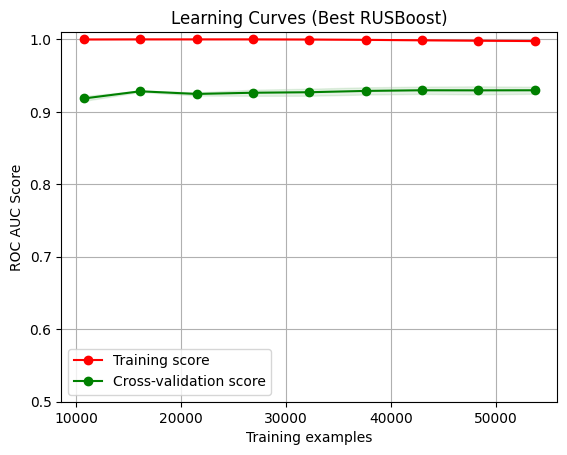

Label
0    56340
1    10740
Name: count, dtype: int64


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Assume data is already loaded and preprocessed
data = combined_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Define the parameter grid
param_grid = {
    'estimator__max_depth': [5, 10, 15],
    'n_estimators': [100, 300, 500, 700, 900],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Instantiate a RUSBoostClassifier with a DecisionTreeClassifier as the base estimator
estimator = DecisionTreeClassifier(random_state=42)
model = RUSBoostClassifier(estimator=estimator, random_state=42)

# Setup the GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X, y)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score (ROC AUC):", best_score)

# Perform detailed evaluation on the best model
scores = {
    'auc_scores': [],
    'accuracy_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'f1_scores': [],
    'confusion_matrices': []
}

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Display all results
for metric, values in scores.items():
    if metric == 'confusion_matrices':
        print(metric, np.sum(values, axis=0))
    else:
        print(metric, values)
        print(f"Mean {metric}: {np.mean(values)}")

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best RUSBoost)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()
print(y.value_counts())

evaluation

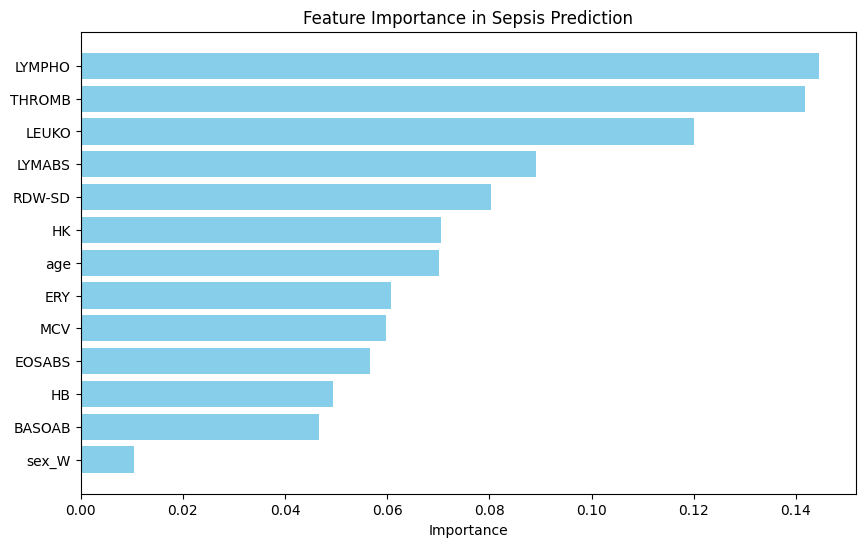

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming best_model is your trained RUSBoostClassifier model

# Check if the model has been fitted and has estimators_
if hasattr(best_model, "estimators_"):
    # Collect all feature importances from each fitted base estimator
    importances = np.array([estimator.feature_importances_ for estimator in best_model.estimators_])

    # Compute the average feature importances across all base estimators
    avg_importances = np.mean(importances, axis=0)

    # Create a DataFrame to hold feature names and their importance scores
    features_df = pd.DataFrame({
        'Feature': features,  # This assumes 'features' holds the names of the features used
        'Importance': avg_importances
    })

    # Sort the DataFrame based on feature importances
    features_df = features_df.sort_values(by='Importance', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importance in Sepsis Prediction')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.show()
else:
    print("The model has not been fitted yet. Please fit the model before accessing feature importances.")


In [32]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Calculate permutation importance with multiple metrics
results = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, scoring=['accuracy', 'roc_auc', 'precision', 'recall', 'f1'])

# Create a DataFrame to hold the results for each metric
importance_df = pd.DataFrame(features, columns=['Feature'])

# Extract importance data for each metric and add to the DataFrame
importance_df['Accuracy Impact'] = results['accuracy'].importances_mean
importance_df['AUROC Impact'] = results['roc_auc'].importances_mean
importance_df['Precision Impact'] = results['precision'].importances_mean
importance_df['Recall Impact'] = results['recall'].importances_mean
importance_df['F1 Score Impact'] = results['f1'].importances_mean

# Display the DataFrame sorted by one of the impacts, for example, 'Accuracy Impact'
importance_df = importance_df.sort_values(by='Accuracy Impact', ascending=False)
print(importance_df)

   Feature  Accuracy Impact  AUROC Impact  Precision Impact  Recall Impact  \
7   LYMPHO         0.055702      0.030366          0.100586       0.010149   
5    LEUKO         0.052586      0.034596          0.096452       0.021369   
10  THROMB         0.049463      0.065640          0.096166       0.114246   
6   LYMABS         0.033699      0.009111          0.065043      -0.011034   
4       HK         0.012433      0.008843          0.025863       0.004330   
11     age         0.009921      0.004787          0.020802       0.003818   
8      MCV         0.002005      0.000964          0.004453      -0.001536   
1   EOSABS         0.001528      0.002046          0.003200       0.002142   
12   sex_W         0.001215      0.001318          0.002640       0.000186   
3       HB         0.000335      0.001405          0.000541       0.002933   
2      ERY        -0.000022      0.002525         -0.000178       0.001909   
9   RDW-SD        -0.001230      0.004777         -0.003848     

In [33]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd

# Assume data is already loaded and preprocessed
data = combined_df_imputed # Replace with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Instantiate the best model from grid search
best_model = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=300,
    learning_rate=0.01,
    algorithm='SAMME.R',
    random_state=1714400672
)

# Prepare to store evaluation metrics and predictions
scores = {
    'auc_scores': [],
    'accuracy_scores': [],
    'precision_scores': [],
    'recall_scores': [],
    'f1_scores': [],
    'confusion_matrices': []
}
all_predictions = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes and probabilities
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    all_predictions.extend(y_pred_prob)

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Load new data for predictions
new_data = combined_pct_data_sepsis_I_imputed
X_new = new_data[features]

# Predict sepsis risk for the new data
new_predictions = best_model.predict_proba(X_new)[:, 1]

# Create DataFrame with predicted probabilities for new entries
new_sepsis_risk = pd.DataFrame({
    'PCT': new_data['PCT'],
    'Risk of Sepsis (%)': new_predictions * 100
}, index=new_data.index)

print(new_sepsis_risk.head(30))
print(new_sepsis_risk.shape)

     PCT  Risk of Sepsis (%)
0   0.89           80.329942
1   0.22           61.184437
2   0.11           63.460966
3   0.64           67.789725
4   0.13           55.726482
5   0.35           99.230475
6   0.37           60.708623
7   0.14           53.861626
8   0.69           74.991620
9   0.37           53.245704
10  0.26           53.062670
11  0.13           54.193056
12  1.45           30.228866
13  0.26           25.378507
14  0.11           49.895319
15  0.21           55.198027
16  0.11           40.925340
17  0.14           52.151333
18  1.92           58.394135
19  0.49           64.910438
20  1.16           68.510530
21  1.84           73.275560
22  0.39           56.062516
23  0.67           77.292415
24  0.63           89.747349
25  0.46           53.561010
26  0.42           43.669234
27  0.26           78.277953
28  0.86           63.012199
29  0.37           75.902270
(39009, 2)
